In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Cluster Analysis

## K-means / AH / DBSCAN

### K-means clustering
- 그냥 간단하게 적용해보기 좋은 클러스터링 알고리즘
- k를 직접 설정해줘야 하고, 초기 중심점을 어떻게 잡느냐에 따라 결과가 달라질 수 있음
- 군집의 크기가 다르거나, 밀도가 다르거나, 분포가 특이하면 군집을 잘 잡아내지 못할 수 있음
- noise를 잡아내지 않음
- 여러번 군집화를 수행해 가장 빈번히 등장하는 군집에 할당하는 majority voting 방법을 쓰는 경우가 많음
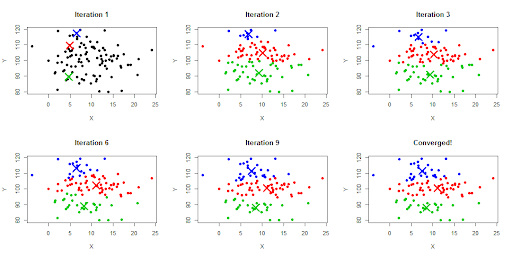

### Agglomerative Hierarchical clustering (AH clustering)
- 몇 개의 군집으로 묶일 것인지 대략적으로 파악해 보기에 좋음
- 큰 데이터 셋에 적용하기에는 무리가 있음
#### 계산 방식
    - Single (nearest-neighbour) : 두 클러스터간 거리를 두 클러스터의 멤버간 거리 중 가장 짧은 것으로 봅니다.
    - Complete (furthest neighbour) : 두 클러스터간 거리를 두 클러스터의 멤버간 거리 중 가장 긴 것으로 봅니다.
    - Centroid : 두 클러스터간 거리를 각 클러스터의 Multivariate mean간의 거리로 봅니다.
    - Average : 두 클러스터간 거리를 두 클러스터의 모든 멤버간 거리의 평균(average)으로 봅니다.
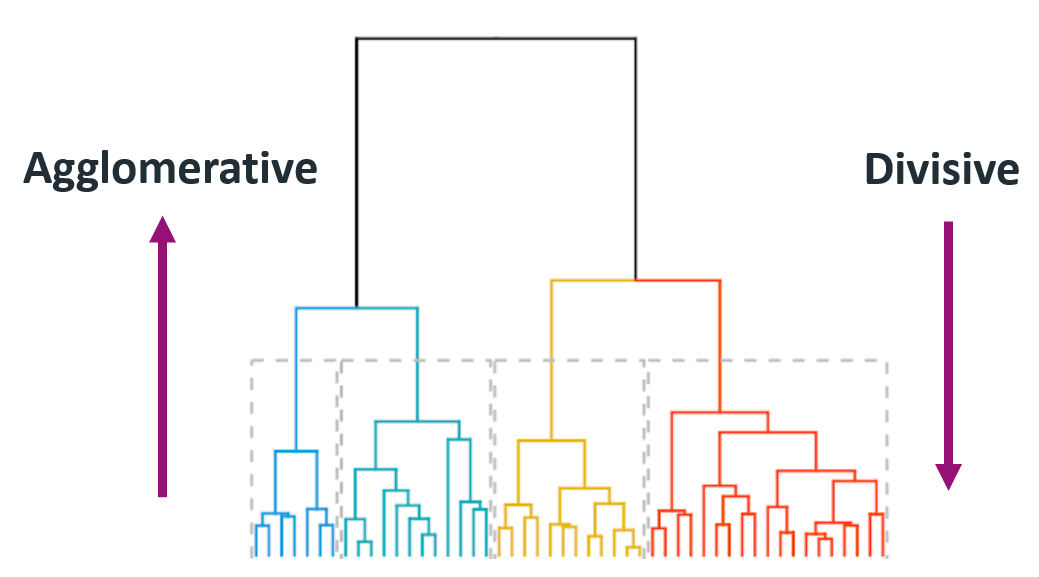

Divisive 방식은 split 하기 위해 다양한 방식을 사용할 수 있는데, 예시로는 k-means를 각 split 마다 적용하는 것이 있음.

### Density Based Spatial Clustering of Applications with Noise (DBSCAN)
- 데이터의 분포를 잘 몰라도 적용해보기 쉬움
- outlier를 걸러낼 수 있음
- minpoints, epsilon이라는 두 파라미터에 따라 결과가 많이 달라질 수도 있음
- 밀도 차이가 큰 그룹들로 이루어진 데이터에서는 잘 작동하지 않을 수 있음
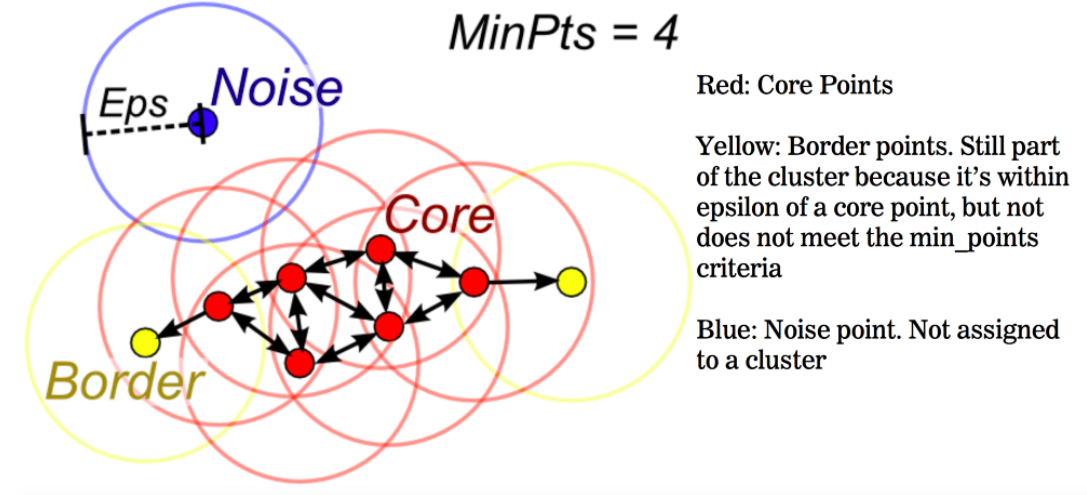

### others
https://scikit-learn.org/stable/modules/clustering.html
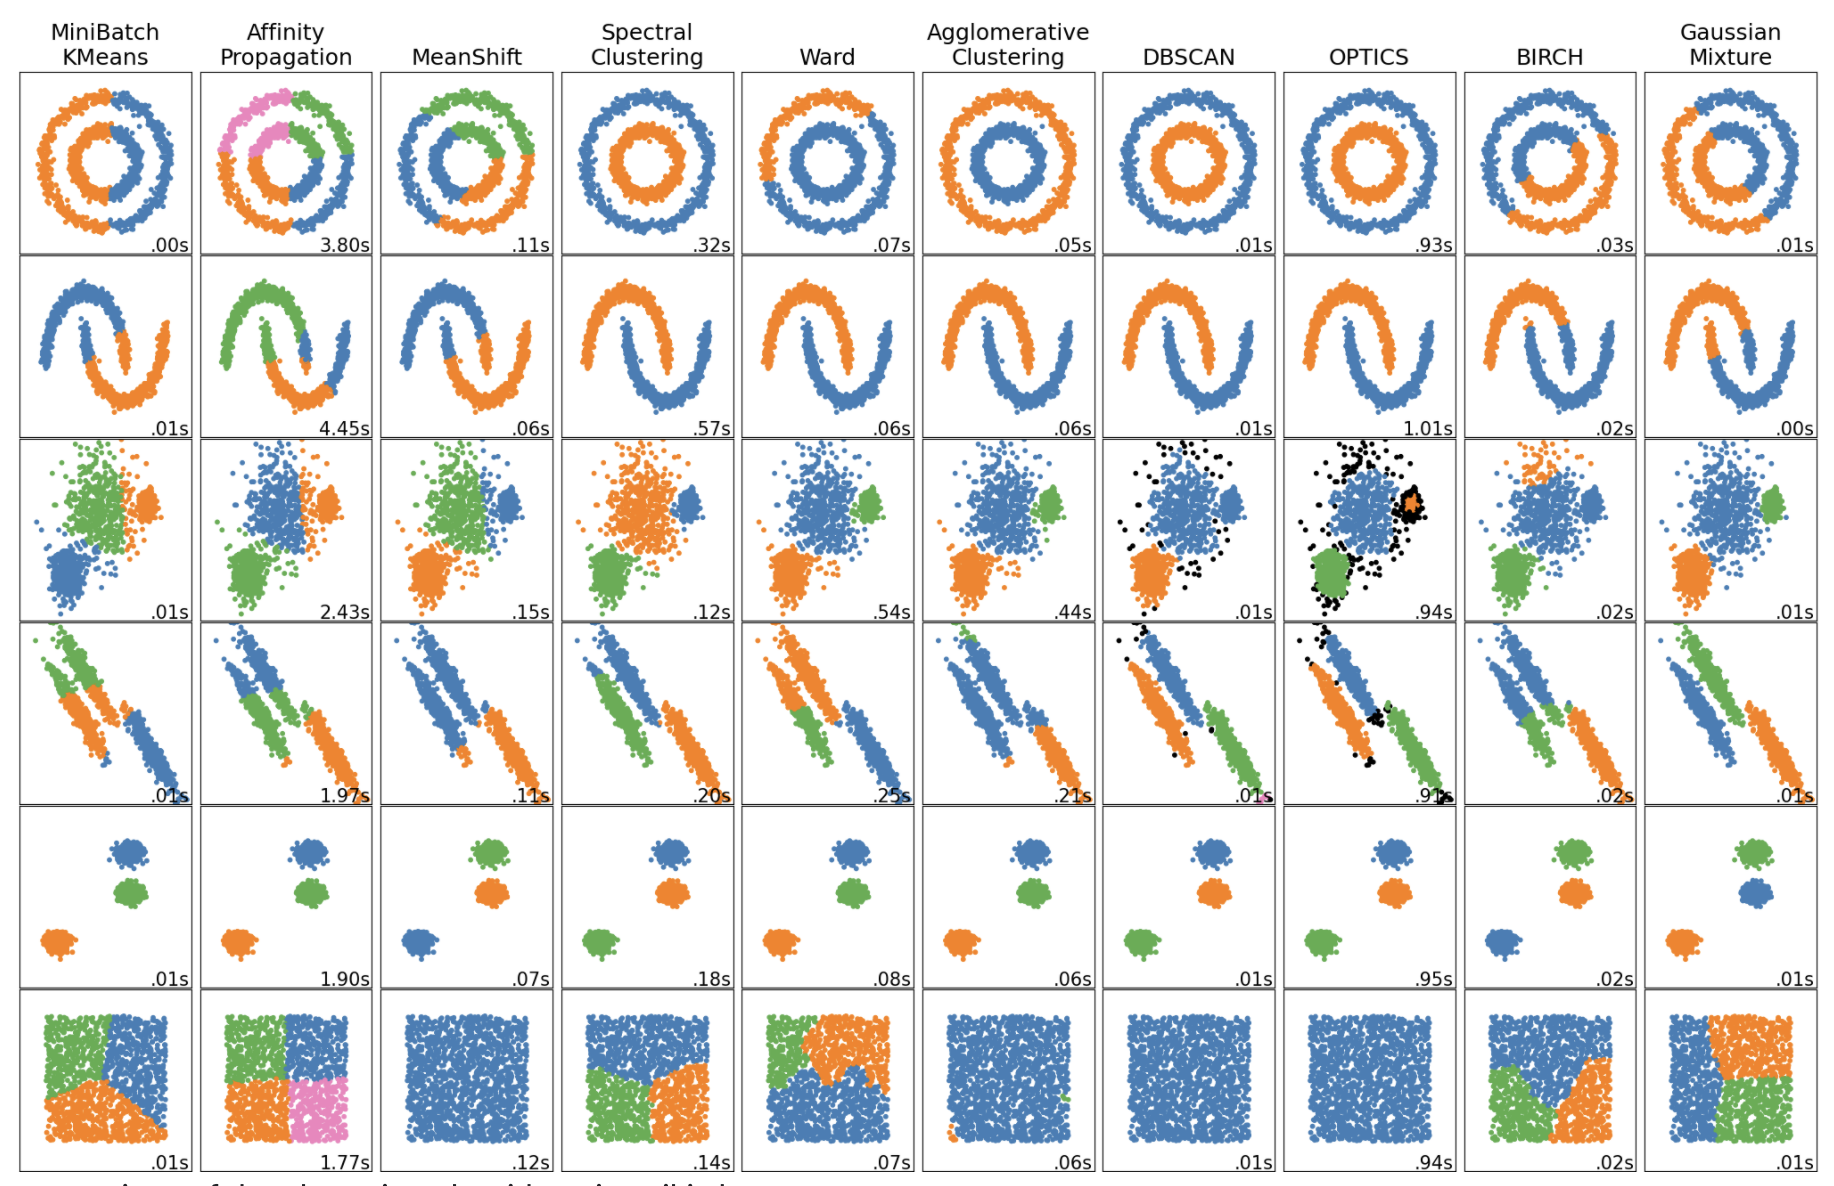

## 실습 data: Utilities.csv
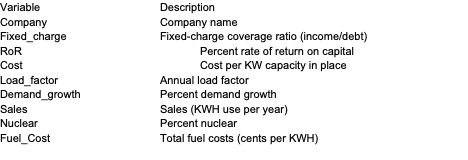

##### data import

In [2]:
utilities_df = pd.read_csv('./data/Utilities.csv')
utilities_df.set_index('Company', inplace=True)
utilities_df.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [3]:
utilities_df.shape

(22, 8)

##### 점들 간의 거리 분포를 살펴보자
- pairwise_distances 함수 활용 (metric='euclidean')

In [4]:
# module import
from sklearn.metrics import pairwise

In [5]:
utilities_df.head(2)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555


In [7]:
d = pairwise.pairwise_distances(utilities_df)
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


In [10]:
d[np.triu_indices(len(d), k=1)]

array([ 3989.40807617,   140.40285538,  2654.27763182,  5777.16767196,
        2050.52943977,  1435.26501879,  4006.10418653,   671.27634634,
        2622.69900172,  8364.03105122,  2923.13610276,  1899.27982096,
         598.55663266,  2609.04536296,  6914.74206461,  3363.06162585,
        1063.00907357,  4430.25158541,  1790.48564783,  2427.5888747 ,
        1016.61769106,  4125.04413172,  1335.46650199,  1788.06802698,
        6039.6890759 ,  2554.28716246,  7994.15598526,  3318.2765576 ,
        1367.09063398, 12353.06269793,  1066.57943191,  2091.16048509,
        4586.30256362,  1380.74996249, 10903.14646362,   629.76074832,
        5052.33166918,  8419.61054132,  2199.72166505,  1562.21081075,
        5005.08126152,  2789.75967357,  5912.5529085 ,  1915.15515444,
        1571.29540091,  3872.25762571,   807.92079223,  2758.55966318,
        8229.22328148,  3058.70742862,  2035.44151976,   461.34167002,
        2744.50284712,  6780.43030749,  3498.11301303,   928.74924867,
      

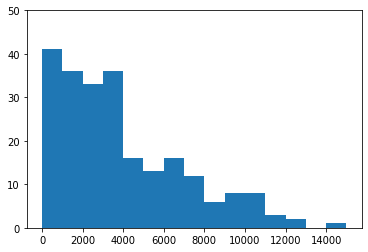

In [11]:
plt.hist(d[np.triu_indices(len(d), k=1)], bins=np.arange(0, 16000, 1000))
plt.ylim(0, 50)
plt.show()

Sales column만 이용해서 거리 구하고 histogram 그려보면 점들 간의 거리에 거의 sales만 반영된다는 것을 알 수 있음

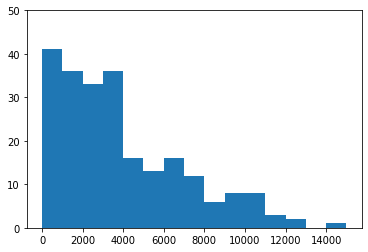

In [13]:
d = pairwise.pairwise_distances(utilities_df[["Sales"]], metric="euclidean")
plt.hist(d[np.triu_indices(len(d), 1)], bins=np.arange(0, 16000, 1000))
plt.ylim(0, 50)
plt.show()

##### 위 데이터를 normalize 하시오.

In [14]:
scaler = preprocessing.StandardScaler()
utilities_df_norm = scaler.fit_transform(utilities_df)
utilities_df_norm

array([[-0.30005669, -0.70075032, -0.42693798, -0.59131032, -0.53861103,
         0.04698311, -0.73144654, -0.87376468],
       [-1.24309198, -0.19902968,  0.84032237,  0.21170369, -0.34166738,
        -1.10312676,  0.81068658,  0.83243571],
       [ 1.7524319 ,  2.12712967, -1.37117119, -0.91251592,  0.05221991,
         0.08590636, -0.73144654, -0.08232329],
       [-0.52194734,  0.21146903, -0.00451786, -0.2242182 , -0.96532226,
        -0.71821909,  1.35927148, -0.74124426],
       [ 2.08526789, -0.88319419,  0.59183995, -1.32549456, -0.73555468,
        -1.61864354,  0.21943396,  1.73247023],
       [ 1.14223259,  1.26052129, -1.42086767,  0.6935121 , -1.78592078,
         0.63803982,  0.64001572,  0.25449944],
       [ 0.58750595,  0.66757871,  0.16941983,  2.43719967, -0.34166738,
        -0.36675659, -0.73144654,  1.01097017],
       [-0.07816603, -0.70075032,  1.90879679,  0.00521438,  0.01939597,
         1.20170611, -0.73144654, -1.46090376],
       [ 1.25317792,  1.03246645

##### normalize한 데이터를 이용하여 점들 간의 거리 분포를 살펴보시오.

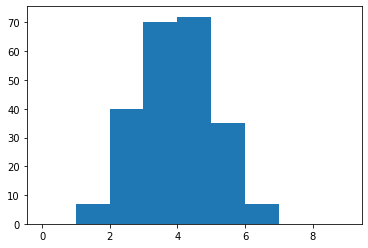

In [15]:
d = pairwise.pairwise_distances(utilities_df_norm)
plt.hist(d[np.triu_indices(len(d), k=1)], bins=range(10))
plt.show()

normalize 전에는 Sales column이 너무 큰 영향을 끼쳤었는데, normalize 후에는 그렇지 않은지 확인해보면 확연히 차이가 나는 것을 확인할 수 있음

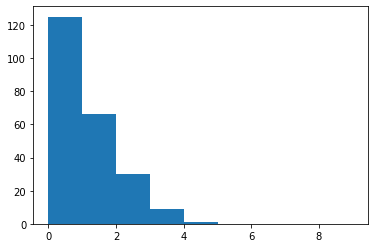

In [16]:
sales_norm = utilities_df_norm[:, 5].reshape(len(utilities_df_norm), -1)
d_sales_norm = pairwise.pairwise_distances(sales_norm)
plt.hist(d_sales_norm[np.triu_indices(len(d_sales_norm), 1)], bins=range(10))
plt.show()

## K-means clustering

##### import module

In [17]:
from sklearn.cluster import KMeans

##### learn model
- clusuter의 수가 6개라고 했을 때

In [20]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(utilities_df_norm)

KMeans(n_clusters=6, random_state=0)

In [24]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(utilities_df_norm)

KMeans(n_clusters=6, random_state=0)

##### check result

In [21]:
kmeans.labels_

array([2, 1, 2, 0, 3, 2, 1, 5, 2, 0, 4, 1, 0, 2, 1, 5, 1, 2, 2, 0, 1, 0],
      dtype=int32)

In [27]:
result_df = pd.DataFrame(kmeans.labels_, index=utilities_df.index, columns=["cluster_num"]).sort_values("cluster_num")
result_df

,cluster_num
Company,
Virginia,0
Wisconsin,0
Commonwealth,0
Madison,0
Northern,0
Boston,1
Hawaiian,1
San Diego,1
Pacific,1


각 cluster에 속한 company 정보를 출력해보면

In [28]:
for i in range(6):
    print("cluter ", i)
    print(result_df[result_df.cluster_num==i].index.values)

cluter  0
['Virginia' 'Wisconsin' 'Commonwealth' 'Madison ' 'Northern']
cluter  1
['Boston ' 'Hawaiian ' 'San Diego' 'Pacific ' 'United' 'New England']
cluter  2
['Texas' 'Southern' 'Arizona ' 'Kentucky' 'Florida ' 'Central ' 'Oklahoma']
cluter  3
['NY']
cluter  4
['Nevada']
cluter  5
['Puget' 'Idaho']


##### 각 cluster의 중심 값: cluster_centers_

In [29]:
kmeans.cluster_centers_

array([[-0.01159883,  0.33917974,  0.22408597, -0.3664664 ,  0.17038609,
        -0.41133091,  1.60186791, -0.60946007],
       [-0.63289267, -0.6399357 ,  0.2066922 ,  1.17532051,  0.05769056,
        -0.75771898, -0.38096174,  1.20361559],
       [ 0.51618395,  0.79789576, -1.0090968 , -0.3454897 , -0.50109796,
         0.3601402 , -0.53552336, -0.42019777],
       [ 2.08526789, -0.88319419,  0.59183995, -1.32549456, -0.73555468,
        -1.61864354,  0.21943396,  1.73247023],
       [-2.01970929, -1.47613677,  0.11972335, -1.25666479,  1.06976207,
         2.4584945 , -0.73144654, -0.61608609],
       [ 0.08825197, -0.54111193,  1.99576564, -0.10950191,  0.98770222,
         1.62106805, -0.73144654, -1.17469647]])

In [30]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,-0.011599,0.339180,0.224086,-0.366466,0.170386,-0.411331,1.601868,-0.609460,Cluster 0
1,-0.632893,-0.639936,0.206692,1.175321,0.057691,-0.757719,-0.380962,1.203616,Cluster 1
2,0.516184,0.797896,-1.009097,-0.345490,-0.501098,0.360140,-0.535523,-0.420198,Cluster 2
3,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470,Cluster 3
4,-2.019709,-1.476137,0.119723,-1.256665,1.069762,2.458495,-0.731447,-0.616086,Cluster 4
5,0.088252,-0.541112,1.995766,-0.109502,0.987702,1.621068,-0.731447,-1.174696,Cluster 5


##### 각 data point가 군집의 중심과 얼마나 멀리 있는지 계산: transform

In [31]:
kmeans.transform(utilities_df_norm)

array([[2.80463747, 3.01304154, 1.91183392, 4.22015724, 3.57331973,
        3.34302792],
       [2.44255693, 1.93219549, 3.65618216, 3.94351735, 4.90542302,
        4.35004991],
       [3.89037563, 4.76270406, 2.0692265 , 4.57389571, 6.04179216,
        5.12788757],
       [1.34517427, 3.25569104, 2.74174758, 4.2244954 , 4.97920977,
        4.33573141],
       [4.0767781 , 3.98253408, 4.24098938, 0.        , 6.61302985,
        5.51143137],
       [3.55098934, 4.11511346, 2.32812062, 4.70843784, 6.14585975,
        5.40904898],
       [4.08223472, 2.29455555, 3.43434937, 4.70442327, 6.13691133,
        4.69331701],
       [3.58556579, 3.95487605, 3.65197074, 5.27683877, 3.54407112,
        1.12663163],
       [3.20565908, 3.36171535, 2.53453091, 4.59555879, 5.29702691,
        3.5201866 ],
       [1.00294168, 3.9480126 , 3.13147853, 4.14047216, 5.20104925,
        4.0689759 ],
       [4.75609101, 4.83188166, 4.54465659, 6.61302985, 0.        ,
        3.34265641],
       [3.50290484, 1

In [32]:
distance_df = pd.DataFrame(kmeans.transform(utilities_df_norm), columns=["c1", "c2", "c3", "c4", "c5", "c6"])
distance_df

,c1,c2,c3,c4,c5,c6
0,2.804637,3.013042,1.911834,4.220157,3.573320,3.343028
1,2.442557,1.932195,3.656182,3.943517,4.905423,4.350050
2,3.890376,4.762704,2.069227,4.573896,6.041792,5.127888
3,1.345174,3.255691,2.741748,4.224495,4.979210,4.335731
4,4.076778,3.982534,4.240989,0.000000,6.613030,5.511431
5,3.550989,4.115113,2.328121,4.708438,6.145860,5.409049
6,4.082235,2.294556,3.434349,4.704423,6.136911,4.693317
7,3.585566,3.954876,3.651971,5.276839,3.544071,1.126632
8,3.205659,3.361715,2.534531,4.595559,5.297027,3.520187
9,1.002942,3.948013,3.131479,4.140472,5.201049,4.068976


##### cluster 중심과의 거리 제곱의 합: inertia_
elbow method를 이용한 cluster 평가에서 사용되는 값

In [33]:
kmeans.inertia_

63.16728556841679

In [34]:
# distance_df를 이용해서 inertia 값 직접 구해보면
(distance_df.min(axis=1)**2).sum()

63.167285568416794

### performance analysis

##### elbow method: cluster 개수 설정 별로 군집 별 평균 반경 거리에 대해 plot
- k=1 ~ k=6 평가

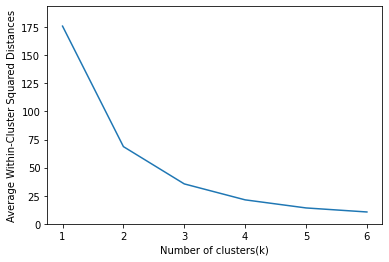

In [39]:
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(utilities_df_norm)
    inertia.append(kmeans.inertia_/k)

inertia_df = pd.DataFrame({"n_clusters": range(1, 7), "inertia": inertia})
inertia_df.plot(x="n_clusters", y="inertia")
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertia_df.inertia.max()))
plt.legend().set_visible(False)
plt.show()

## AH clustering
- Single (nearest-neighbour) : 두 클러스터간 거리를 두 클러스터의 멤버간 거리 중 가장 짧은 것으로 봅니다. (sklearn에 있음)
- Complete (furthest neighbour) : 두 클러스터간 거리를 두 클러스터의 멤버간 거리 중 가장 긴 것으로 봅니다. (sklearn에 있음)
- Centroid : 두 클러스터간 거리를 각 클러스터의 Multivariate mean간의 거리로 봅니다. (sklearn에 없음) 
- Average : 두 클러스터간 거리를 두 클러스터의 모든 멤버간 거리의 평균(average)으로 봅니다. (sklearn에 있음)
- ward: 클러스터 내 데이터 간 거리의 분산이 작은 방향으로 합침. (sklearn에 있음, default)

##### import modules

In [40]:
from sklearn.cluster import AgglomerativeClustering

##### learn model

In [41]:
agg = AgglomerativeClustering(n_clusters=6)
agg.fit(utilities_df_norm)

AgglomerativeClustering(n_clusters=6)

##### check result

In [42]:
agg.labels_

array([0, 1, 0, 1, 4, 0, 3, 2, 0, 1, 2, 3, 1, 0, 3, 2, 5, 0, 0, 1, 3, 1])

In [43]:
result_df = pd.DataFrame(agg.labels_, index=utilities_df.index, columns=["cluster_num"]).sort_values("cluster_num")
result_df

,cluster_num
Company,
Arizona,0
Central,0
Texas,0
Southern,0
Florida,0
Oklahoma,0
Kentucky,0
Wisconsin,1
Northern,1


각 cluster에 속한 company 정보를 출력해보면

In [44]:
for i in range(6):
    print("cluter ", i)
    print(result_df[result_df.cluster_num==i].index.values)

cluter  0
['Arizona ' 'Central ' 'Texas' 'Southern' 'Florida ' 'Oklahoma' 'Kentucky']
cluter  1
['Wisconsin' 'Northern' 'Virginia' 'Commonwealth' 'Boston ' 'Madison ']
cluter  2
['Idaho' 'Puget' 'Nevada']
cluter  3
['United' 'New England' 'Hawaiian ' 'Pacific ']
cluter  4
['NY']
cluter  5
['San Diego']


##### visualization

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

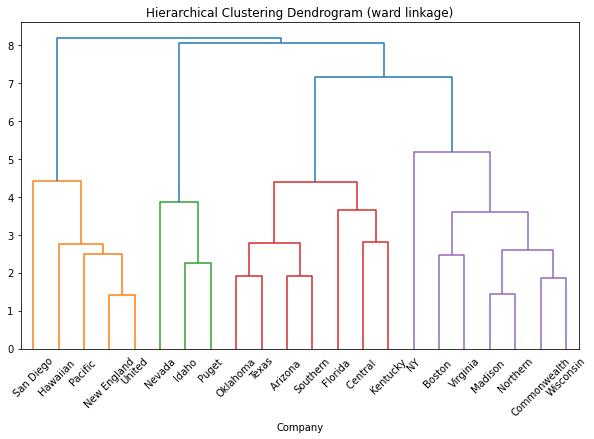

In [47]:
Z = linkage(utilities_df_norm, method="ward")
fig = plt.figure(figsize=(10, 6))
dendrogram(Z, labels=list(utilities_df.index))
plt.title('Hierarchical Clustering Dendrogram (ward linkage)')
plt.xlabel('Company')
plt.show()

### performance analysis

##### silhouette method
- -1~1 사이 값을 가지며 일반적으로 0.5 이상이면 clustering이 잘 됐다고 평가함
- 내부 평균 거리와, 외부와의 최소 거리를 이용하여 값을 측정함

$\frac{(b-a)}{max(a,b)}$

(가) cluster <br>
b: 가장 가까운 다른 cluster와의 거리 <br>
a: cluster내에서 가장 먼 거리

In [48]:
from sklearn.metrics import silhouette_score, silhouette_samples

##### 그냥 전체 평균 silhouette score를 구하기

In [49]:
silhouette_avg = silhouette_score(utilities_df_norm, agg.labels_)
silhouette_avg

0.2432941736793577

##### cluster 수를 2~6으로 할 때 평균 silhouette score 평가

In [50]:
for k in range(2, 7):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(utilities_df_norm)
    print("cluster num: ", k)
    print(silhouette_score(utilities_df_norm, agg.labels_))

cluster num:  2
0.16343692585600914
cluster num:  3
0.21498486449640267
cluster num:  4
0.24309869220155864
cluster num:  5
0.24921457072977693
cluster num:  6
0.2432941736793577


##### 다 성능이 좋지 않은데, 왜 그런지 silhouette plot을 통해 확인해보면

In [52]:
silhouette_samples(utilities_df_norm, agg.labels_)

array([ 7.43305712e-02, -2.53659654e-02,  2.82569410e-01,  3.49440469e-01,
        0.00000000e+00,  1.54312866e-01,  3.63821668e-01,  2.52554907e-01,
       -4.30310332e-04,  4.33366806e-01,  2.74680333e-01,  4.83259705e-01,
        4.16899347e-01,  2.84487507e-01,  2.78738865e-01,  3.74813007e-01,
        0.00000000e+00,  1.56469396e-01,  3.37757057e-01,  2.97389583e-01,
        3.36922486e-01,  2.26454112e-01])

In [53]:
agg.labels_

array([0, 1, 0, 1, 4, 0, 3, 2, 0, 1, 2, 3, 1, 0, 3, 2, 5, 0, 0, 1, 3, 1])

In [54]:
np.unique([1, 1, 2, 2, 4])

array([1, 2, 4])

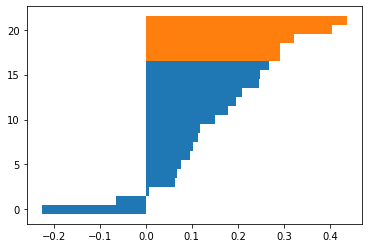

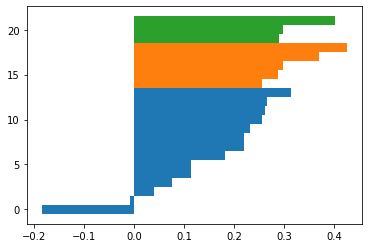

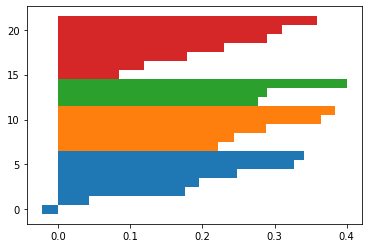

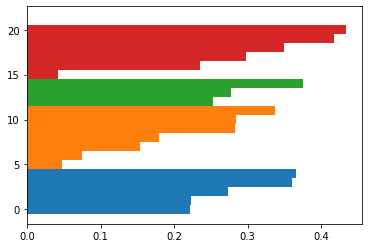

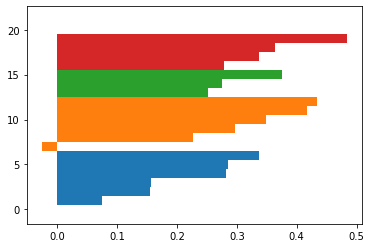

In [51]:
for k in range(2, 7):
    fig, ax = plt.subplots(1, 1)
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(utilities_df_norm)
    silhouette_vals = silhouette_samples(utilities_df_norm, agg.labels_)
    y_ticks = []
    y_lower = y_upper = 0
    for c_num in np.unique(agg.labels_):
        cluster_silhouette_vals = silhouette_vals[agg.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort() # numpy array는 sort 메소드를 이용하면 오름차순으로 정렬된 형태로 바뀜
        
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

point가 하나 뿐인 cluster는 score가 0으로 계산되는 듯 함

## DBSCAN

##### import module

In [55]:
from sklearn.cluster import DBSCAN

##### learn model

In [56]:
dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(utilities_df_norm)

DBSCAN(eps=2, min_samples=2)

##### check result

In [57]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1,  2, -1, -1,  1, -1,  2,  1,  3, -1, -1, -1,
        0,  3,  1,  2, -1])

In [58]:
result_df = pd.DataFrame(dbscan.labels_, index=utilities_df.index, columns=["cluster_num"]).sort_values("cluster_num")
result_df

,cluster_num
Company,
Nevada,-1
San Diego,-1
Puget,-1
Pacific,-1
Kentucky,-1
Idaho,-1
Virginia,-1
Florida,-1
NY,-1


##### eps를 1.5 ~ 4 (0.2간격)으로 할 때 평균 silhouette score 평가
- outlier로 처리된 데이터들은 빼고 평가

In [59]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1,  2, -1, -1,  1, -1,  2,  1,  3, -1, -1, -1,
        0,  3,  1,  2, -1])

In [62]:
a = np.array([1, 1, 1, 1, 2])
a

array([1, 1, 1, 1, 2])

In [63]:
np.all(a==1)

False

In [64]:
result = dbscan.labels_
result

array([ 0, -1, -1,  1, -1, -1,  2, -1, -1,  1, -1,  2,  1,  3, -1, -1, -1,
        0,  3,  1,  2, -1])

In [66]:
result[result!=-1]

array([0, 1, 2, 1, 2, 1, 3, 0, 3, 1, 2])

In [65]:
np.unique(result[result!=-1])

array([0, 1, 2, 3])

In [67]:
len(np.unique(result[result!=-1]))

4

In [68]:
utilities_df_norm

array([[-0.30005669, -0.70075032, -0.42693798, -0.59131032, -0.53861103,
         0.04698311, -0.73144654, -0.87376468],
       [-1.24309198, -0.19902968,  0.84032237,  0.21170369, -0.34166738,
        -1.10312676,  0.81068658,  0.83243571],
       [ 1.7524319 ,  2.12712967, -1.37117119, -0.91251592,  0.05221991,
         0.08590636, -0.73144654, -0.08232329],
       [-0.52194734,  0.21146903, -0.00451786, -0.2242182 , -0.96532226,
        -0.71821909,  1.35927148, -0.74124426],
       [ 2.08526789, -0.88319419,  0.59183995, -1.32549456, -0.73555468,
        -1.61864354,  0.21943396,  1.73247023],
       [ 1.14223259,  1.26052129, -1.42086767,  0.6935121 , -1.78592078,
         0.63803982,  0.64001572,  0.25449944],
       [ 0.58750595,  0.66757871,  0.16941983,  2.43719967, -0.34166738,
        -0.36675659, -0.73144654,  1.01097017],
       [-0.07816603, -0.70075032,  1.90879679,  0.00521438,  0.01939597,
         1.20170611, -0.73144654, -1.46090376],
       [ 1.25317792,  1.03246645

In [71]:
for e in np.arange(1, 4, 0.2):
    print(f"eps: {e:.2f}")
    dbscan = DBSCAN(eps=e, min_samples=2)
    dbscan.fit(utilities_df_norm)
    result = dbscan.labels_
    if np.all(result==-1):
        print("모두 outlier\n")
    elif len(np.unique(result[result!=-1]))==1:
        print("cluster가 한 개 뿐\n")
    else:
        score = silhouette_score(utilities_df_norm[result!=-1], result[result!=-1])
        print(f"{score:.3f}\n")

eps: 1.00
모두 outlier

eps: 1.20
모두 outlier

eps: 1.40
모두 outlier

eps: 1.60
0.603

eps: 1.80
0.564

eps: 2.00
0.316

eps: 2.20
0.412

eps: 2.40
0.253

eps: 2.60
0.239

eps: 2.80
0.234

eps: 3.00
cluster가 한 개 뿐

eps: 3.20
cluster가 한 개 뿐

eps: 3.40
cluster가 한 개 뿐

eps: 3.60
cluster가 한 개 뿐

eps: 3.80
cluster가 한 개 뿐



In [167]:
dbscan = DBSCAN(eps=1.6, min_samples=2)
dbscan.fit(utilities_df_norm)
dbscan.labels_

array([-1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1,  1,  0, -1, -1, -1, -1,
       -1, -1, -1,  1, -1])

그냥 대부분 outlier로 평가됨